# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;














# Steelproof

## 1. Formulación del problema y objetivos del modelo

**Estrategia:** Comprender claramente qué se quiere predecir y por qué. Alinear el objetivo técnico del modelo con el objetivo del negocio.

##### Objetivo del negocio

Steelproof, una planta siderúrgica, busca optimizar los costos de producción reduciendo el consumo energético durante el procesamiento del acero. Dado que el calentamiento del acero representa un gasto importante, es clave predecir con precisión la temperatura final del metal para evitar sobrecalentamientos innecesarios o insuficientes que impliquen más ciclos de ajuste, y por lo tanto, mayor uso de energía y recursos.

##### Objetivo técnico del proyecto

Desarrollar un modelo de aprendizaje automático capaz de predecir la última temperatura medida del acero fundido durante el procesamiento en cuchara.

* Este modelo debe tomar como entrada los datos generados en las distintas etapas del proceso: suministro de aleaciones, uso de energía, purgas de gas, y temperatura previa.

* La variable objetivo es la última temperatura registrada por lote.

##### Métrica de evaluación
Se utilizará la Error Absoluto Medio (EAM) como métrica principal. El objetivo es alcanzar una EAM menor o igual a 6.0.

##### ¿Por qué es importante este modelo?
* **Impacto económico:** Calentar el acero más de lo necesario implica alto consumo eléctrico y desgaste innecesario de los materiales refractarios.

* **Impacto operacional:** Predecir con precisión evita ciclos repetitivos de medición y ajuste de temperatura.

* **Impacto en calidad:** Una temperatura adecuada es crucial para asegurar la correcta composición química y la calidad del producto final.

## 2. Exploración y análisis de datos (EDA)

**Estrategia:** Revisar estructura del dataset, tipos de datos, valores nulos o inconsistentes. Visualizar la distribución de variables, detectar outliers y correlaciones clave.

##### 2.1 Carga de librerías y configuración inicial

In [21]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [2]:
# Configuraciones generales
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-darkgrid')
sns.set_palette("Set2")

##### 2.2 Carga de los datos

In [3]:
# Cargar los datos
arc = pd.read_csv('/datasets/data_arc_en.csv')
bulk = pd.read_csv('/datasets/data_bulk_en.csv')
bulk_time = pd.read_csv('/datasets/data_bulk_time_en.csv')
gas = pd.read_csv('/datasets/data_gas_en.csv')
temp = pd.read_csv('/datasets/data_temp_en.csv')
wire = pd.read_csv('/datasets/data_wire_en.csv')
wire_time = pd.read_csv('/datasets/data_wire_time_en.csv')

In [4]:
# Verificar carga de datos
datasets = {
    'arc': arc,
    'bulk': bulk,
    'bulk_time': bulk_time,
    'gas': gas,
    'temp': temp,
    'wire': wire,
    'wire_time': wire_time
}

for name, df in datasets.items():
    print(f'{name}: {df.shape[0]:,} filas × {df.shape[1]} columnas')

arc: 14,876 filas × 5 columnas
bulk: 3,129 filas × 16 columnas
bulk_time: 3,129 filas × 16 columnas
gas: 3,239 filas × 2 columnas
temp: 15,907 filas × 3 columnas
wire: 3,081 filas × 10 columnas
wire_time: 3,081 filas × 10 columnas


##### 2.3. Revisión de estructura general

In [5]:
# Mostrar número de filas y columnas, Revisar tipos de datos, Verificar duplicados, revisión de nombres de columnas y presencia de claves (key)
def revisar_estructura(nombre, df):
    print(f"\n{'='*30}\n{name.upper()} — {df.shape[0]:,} filas × {df.shape[1]} columnas\n")
    print("Primeras filas:")
    display(df.head())
    print("\nTipos de datos:")
    print(df.dtypes)
    print(f"\nDuplicados: {df.duplicated().sum()} filas duplicadas")

# Aplicar la función a cada dataset
for name, df in datasets.items():
    revisar_estructura(name, df)


ARC — 14,876 filas × 5 columnas

Primeras filas:


,key,Arc heating start,Arc heating end,Active power,Reactive power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397



Tipos de datos:
key                    int64
Arc heating start     object
Arc heating end       object
Active power         float64
Reactive power       float64
dtype: object

Duplicados: 0 filas duplicadas

BULK — 3,129 filas × 16 columnas

Primeras filas:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0



Tipos de datos:
key          int64
Bulk 1     float64
Bulk 2     float64
Bulk 3     float64
Bulk 4     float64
Bulk 5     float64
Bulk 6     float64
Bulk 7     float64
Bulk 8     float64
Bulk 9     float64
Bulk 10    float64
Bulk 11    float64
Bulk 12    float64
Bulk 13    float64
Bulk 14    float64
Bulk 15    float64
dtype: object

Duplicados: 0 filas duplicadas

BULK_TIME — 3,129 filas × 16 columnas

Primeras filas:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56



Tipos de datos:
key         int64
Bulk 1     object
Bulk 2     object
Bulk 3     object
Bulk 4     object
Bulk 5     object
Bulk 6     object
Bulk 7     object
Bulk 8     object
Bulk 9     object
Bulk 10    object
Bulk 11    object
Bulk 12    object
Bulk 13    object
Bulk 14    object
Bulk 15    object
dtype: object

Duplicados: 0 filas duplicadas

GAS — 3,239 filas × 2 columnas

Primeras filas:


,key,Gas 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692



Tipos de datos:
key        int64
Gas 1    float64
dtype: object

Duplicados: 0 filas duplicadas

TEMP — 15,907 filas × 3 columnas

Primeras filas:


,key,Sampling time,Temperature
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0



Tipos de datos:
key                int64
Sampling time     object
Temperature      float64
dtype: object

Duplicados: 0 filas duplicadas

WIRE — 3,081 filas × 10 columnas

Primeras filas:


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Tipos de datos:
key         int64
Wire 1    float64
Wire 2    float64
Wire 3    float64
Wire 4    float64
Wire 5    float64
Wire 6    float64
Wire 7    float64
Wire 8    float64
Wire 9    float64
dtype: object

Duplicados: 0 filas duplicadas

WIRE_TIME — 3,081 filas × 10 columnas

Primeras filas:


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Tipos de datos:
key        int64
Wire 1    object
Wire 2    object
Wire 3    object
Wire 4    object
Wire 5    object
Wire 6    object
Wire 7    object
Wire 8    object
Wire 9    object
dtype: object

Duplicados: 0 filas duplicadas


##### Anotaciones
**ARC:**
* Las columnas de tiempo (Arc heating start, Arc heating end) están en formato object. Convertir a datetime.

**BULK y BULK_TIME:**
* BULK: contiene cantidades de materiales, tipo float64, con muchos NaN. Es esperable, ya que no todos los materiales se usan en todos los lotes.
* BULK_TIME: todas las columnas son tipo object pero contienen fechas. Convertir columnas (excepto key) a datetime.

**GAS:**
* Tipos correctos, nada que corregir.

**TEMP:**
* Sampling time está como object pero es una fecha. Convertir a datetime.

**WIRE:**
* Tipos correctos, nada que corregir.

**WIRE_TIME:**
* Columnas de tiempo están en object. Convertir columnas (excepto key) a datetime.

**Nombre de columnas:** Todas se pueden cambiar a snake_case.

**Duplicados:** No cuenta con duplicados.

Se corrige en la próxima sección.

##### 2.4 Calidad de los datos

In [6]:
# Conversión de nombres de columnas a snake_case

def to_snake_case(s):
    # Elimina espacios, convierte a minúsculas, reemplaza espacios y guiones por guión bajo
    s = re.sub(r'[\s\-]+', '_', s)
    s = re.sub(r'([a-z])([A-Z])', r'\1_\2', s)
    return s.lower()

def renombrar_columnas_snake_case(datasets):
    for name, df in datasets.items():
        df.columns = [to_snake_case(col) for col in df.columns]
    print("✔️ Columnas renombradas a snake_case")


renombrar_columnas_snake_case(datasets)

✔️ Columnas renombradas a snake_case


In [7]:
# Conteo de valores faltantes por columna, Identificación de columnas con alta proporción de datos faltantes, Conversión de columnas de fecha que están mal tipadas.
# Función para revisar valores nulos
def revisar_nulos(nombre, df):
    print(f'\n{name.upper()} - Porcentaje de valores nulos por columna:')
    print((df.isna().mean() * 100).round(2).sort_values(ascending=False))

# Revisar nulos en todos los datasets
for name, df in datasets.items():
    revisar_nulos(name, df)

# Conversión de columnas de fecha a datetime

# ARC
arc['arc_heating_start'] = pd.to_datetime(arc['arc_heating_start'])
arc['arc_heating_end'] = pd.to_datetime(arc['arc_heating_end'])

# BULK_TIME
bulk_time.iloc[:, 1:] = bulk_time.iloc[:, 1:].apply(pd.to_datetime)

# TEMP
temp['sampling_time'] = pd.to_datetime(temp['sampling_time'])

# WIRE_TIME
wire_time.iloc[:, 1:] = wire_time.iloc[:, 1:].apply(pd.to_datetime)



ARC - Porcentaje de valores nulos por columna:
key                  0.0
arc_heating_start    0.0
arc_heating_end      0.0
active_power         0.0
reactive_power       0.0
dtype: float64

BULK - Porcentaje de valores nulos por columna:
bulk_8     99.97
bulk_13    99.42
bulk_9     99.39
bulk_2     99.30
bulk_7     99.20
bulk_5     97.54
bulk_10    94.38
bulk_11    94.34
bulk_1     91.95
bulk_6     81.59
bulk_4     67.59
bulk_3     58.52
bulk_15    28.16
bulk_12    21.70
bulk_14    10.32
key         0.00
dtype: float64

BULK_TIME - Porcentaje de valores nulos por columna:
bulk_8     99.97
bulk_13    99.42
bulk_9     99.39
bulk_2     99.30
bulk_7     99.20
bulk_5     97.54
bulk_10    94.38
bulk_11    94.34
bulk_1     91.95
bulk_6     81.59
bulk_4     67.59
bulk_3     58.52
bulk_15    28.16
bulk_12    21.70
bulk_14    10.32
key         0.00
dtype: float64

GAS - Porcentaje de valores nulos por columna:
key      0.0
gas_1    0.0
dtype: float64

TEMP - Porcentaje de valores nulos por column

In [8]:
# Verificar cambios
for name, df in datasets.items():
    revisar_estructura(name, df)


ARC — 14,876 filas × 5 columnas

Primeras filas:


,key,arc_heating_start,arc_heating_end,active_power,reactive_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397



Tipos de datos:
key                           int64
arc_heating_start    datetime64[ns]
arc_heating_end      datetime64[ns]
active_power                float64
reactive_power              float64
dtype: object

Duplicados: 0 filas duplicadas

BULK — 3,129 filas × 16 columnas

Primeras filas:


,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0



Tipos de datos:
key          int64
bulk_1     float64
bulk_2     float64
bulk_3     float64
bulk_4     float64
bulk_5     float64
bulk_6     float64
bulk_7     float64
bulk_8     float64
bulk_9     float64
bulk_10    float64
bulk_11    float64
bulk_12    float64
bulk_13    float64
bulk_14    float64
bulk_15    float64
dtype: object

Duplicados: 0 filas duplicadas

BULK_TIME — 3,129 filas × 16 columnas

Primeras filas:


,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,NaT,NaT,NaT,2019-05-03 11:21:30,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:03:52,NaT,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaT,NaT,NaT,2019-05-03 11:46:38,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:40:20,NaT,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaT,NaT,NaT,2019-05-03 12:31:06,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:09:40,NaT,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaT,NaT,NaT,2019-05-03 12:48:43,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:41:24,NaT,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaT,NaT,NaT,2019-05-03 13:18:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:12:56,NaT,2019-05-03 13:12:56,2019-05-03 13:12:56



Tipos de datos:
key                 int64
bulk_1     datetime64[ns]
bulk_2     datetime64[ns]
bulk_3     datetime64[ns]
bulk_4     datetime64[ns]
bulk_5     datetime64[ns]
bulk_6     datetime64[ns]
bulk_7     datetime64[ns]
bulk_8     datetime64[ns]
bulk_9     datetime64[ns]
bulk_10    datetime64[ns]
bulk_11    datetime64[ns]
bulk_12    datetime64[ns]
bulk_13    datetime64[ns]
bulk_14    datetime64[ns]
bulk_15    datetime64[ns]
dtype: object

Duplicados: 0 filas duplicadas

GAS — 3,239 filas × 2 columnas

Primeras filas:


,key,gas_1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692



Tipos de datos:
key        int64
gas_1    float64
dtype: object

Duplicados: 0 filas duplicadas

TEMP — 15,907 filas × 3 columnas

Primeras filas:


,key,sampling_time,temperature
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0



Tipos de datos:
key                       int64
sampling_time    datetime64[ns]
temperature             float64
dtype: object

Duplicados: 0 filas duplicadas

WIRE — 3,081 filas × 10 columnas

Primeras filas:


,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Tipos de datos:
key         int64
wire_1    float64
wire_2    float64
wire_3    float64
wire_4    float64
wire_5    float64
wire_6    float64
wire_7    float64
wire_8    float64
wire_9    float64
dtype: object

Duplicados: 0 filas duplicadas

WIRE_TIME — 3,081 filas × 10 columnas

Primeras filas:


,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,2019-05-03 11:11:41,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,2019-05-03 11:46:10,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3,2019-05-03 12:13:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,4,2019-05-03 12:48:05,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaT,NaT,NaT,NaT,NaT,NaT,NaT



Tipos de datos:
key                int64
wire_1    datetime64[ns]
wire_2    datetime64[ns]
wire_3    datetime64[ns]
wire_4    datetime64[ns]
wire_5    datetime64[ns]
wire_6    datetime64[ns]
wire_7    datetime64[ns]
wire_8    datetime64[ns]
wire_9    datetime64[ns]
dtype: object

Duplicados: 0 filas duplicadas


##### Conclusiones de calidad de los datos (nulos)
**arc, gas, wire_time y bulk_time:** 
* No hay en arc, gas, ni en las claves de tiempo (key).

**bulk, wire y sus versiones _time:**
* Muchas columnas tienen más del 90% de valores faltantes, lo que indica que solo unos pocos tipos de materiales se usan en cada lote.
* Esto es esperado, pero se podría:
    - Eliminar columnas con > 95% de nulos (criterio flexible).
    - Rellenar con ceros (si la ausencia de dato significa "no se aplicó ese material").
    - También puedes combinar ambas: eliminar lo extremo y rellenar lo razonable.

**temp:**
* Hay un 18% de valores nulos en la temperatura, nuestra variable objetivo.
* Se deberá eliminar esas filas al armar el dataset final, porque no se puede entrenar el modelo sin target.

##### 2.5 Análisis de variables numéricas

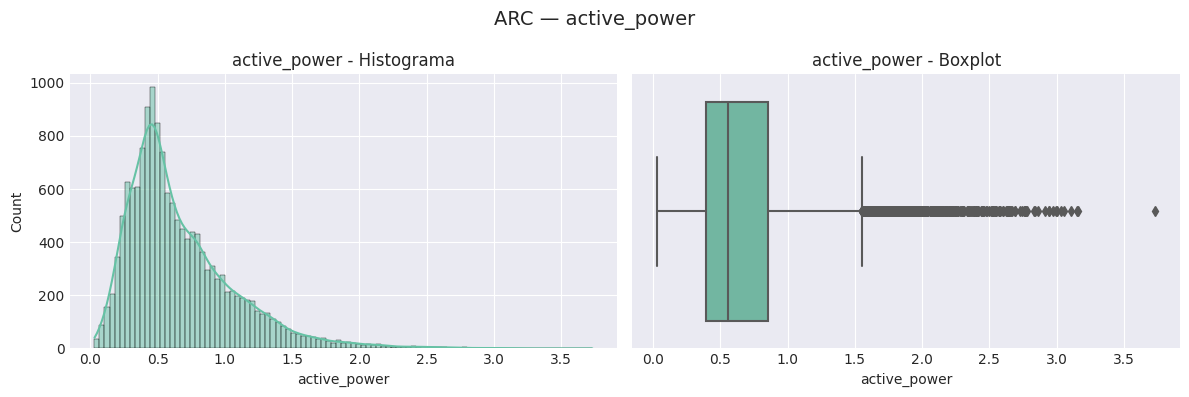

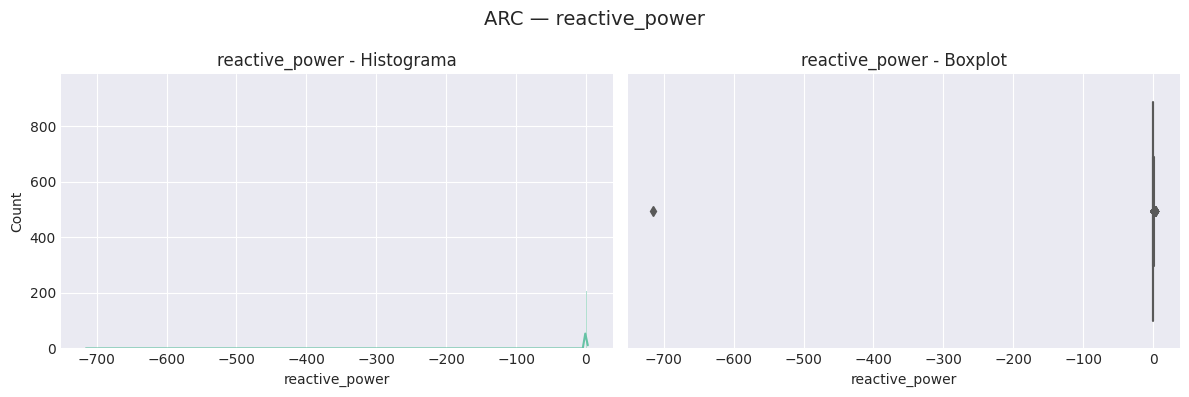

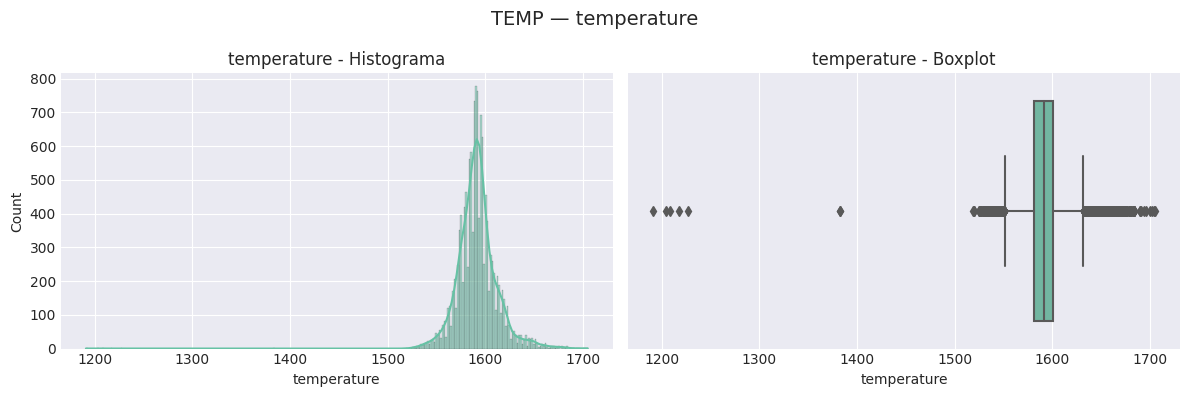

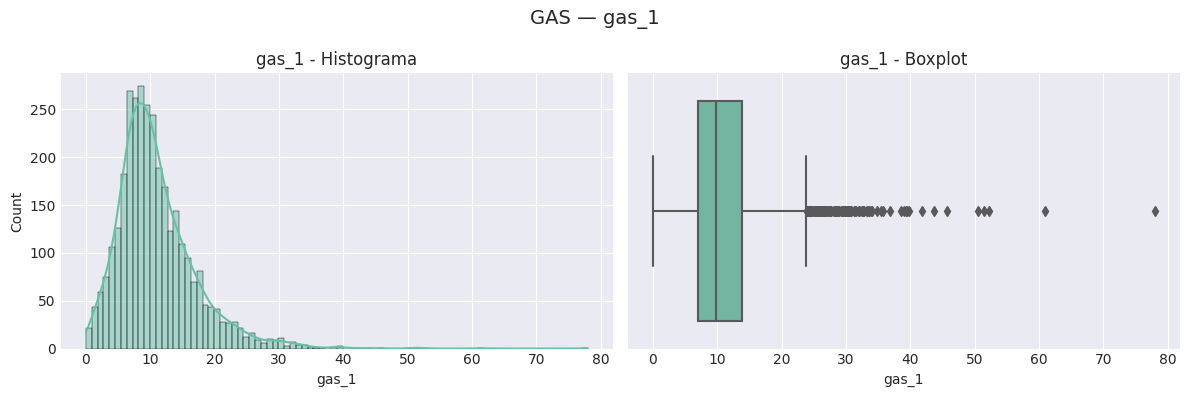

In [9]:
# Distribución de valores: histogramas, boxplots

# Función para graficar histogramas y boxplots de una columna numérica
def plot_distribution(df, columna, nombre_df):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[columna].dropna(), kde=True, ax=axs[0])
    axs[0].set_title(f'{columna} - Histograma')
    
    sns.boxplot(x=df[columna], ax=axs[1])
    axs[1].set_title(f'{columna} - Boxplot')

    fig.suptitle(f'{nombre_df.upper()} — {columna}', fontsize=14)
    plt.tight_layout()
    plt.show()

# Ejemplos de análisis
plot_distribution(arc, 'active_power', 'arc')
plot_distribution(arc, 'reactive_power', 'arc')
plot_distribution(temp, 'temperature', 'temp')
plot_distribution(gas, 'gas_1', 'gas')

**Resumen del análisis de outliers**

**active_power (arc):**
* Distribución: asimétrica derecha, típica de consumo energético.
* Outliers: sí hay, pero dentro de un rango lógico (hasta ~3.5).
* Acción sugerida: mantener todos los valores, podrían ser válidos.

**reactive_power (arc):**
* Distribución: se concentra en valores muy cercanos a cero, pero hay valores negativos extremos cercanos a -700.
* Eso parece un error físico o de sensor (reactive power debería ser positiva o cercana a cero).
* Acción sugerida:
    * Eliminar filas con reactive_power < -100, o
    * Reemplazar extremos negativos con NaN y luego imputar si fuera necesario.

**temperature (temp):**
* Distribución: normal asimétrica (como se espera en temperaturas industriales).
* Outliers: pocos, pero existen debajo de ~1300 y arriba de ~1675 °C.
* En contextos industriales, estos pueden ser válidos (aunque raros).
* Acción sugerida:
    * Mantenerlos si el negocio permite temperaturas fuera del rango central.
    * O eliminar valores fuera de [1300, 1700] si se considera fuera de especificación.

**gas_1 (gas):**
* Distribución: concentrada entre 0 y 20, pero hay valores hasta ~80.
* En contexto de gas inerte, estos valores altos pueden ser válidos si se usó mucha purga.
* Acción sugerida: mantener.

In [10]:
# Filtrar outliers
arc = arc[arc['reactive_power'] > -100]

#Imputación de valores faltantes
for name in ['bulk', 'bulk_time', 'wire', 'wire_time']:
    datasets[name] = datasets[name].fillna(0)

#Eliminar nulos en temperatura para entrenamiento
temp = temp.dropna(subset=['temperature'])


In [11]:
# Estadísticas descriptivas (describe())
# Mostrar describe() para datasets numéricos clave
for name in ['arc', 'temp', 'gas']:
    print(f'\n{name.upper()}')
    display(datasets[name].describe().T)



ARC


,count,mean,std,min,25%,50%,75%,max
key,14876.0,1615.220422,934.571502,1.000000,806.000000,1617.000000,2429.000000,3241.000000
active_power,14876.0,0.670441,0.408159,0.030002,0.395297,0.555517,0.857034,3.731596
reactive_power,14876.0,0.452592,5.878702,-715.504924,0.290991,0.415962,0.637371,2.676388



TEMP


,count,mean,std,min,25%,50%,75%,max
key,15907.0,1607.88087,942.212073,1.0,790.0,1618.0,2427.0,3241.0
temperature,13006.0,1591.84092,21.375851,1191.0,1581.0,1591.0,1601.0,1705.0



GAS


,count,mean,std,min,25%,50%,75%,max
key,3239.0,1621.861377,935.386334,1.000000,812.500000,1622.000000,2431.500000,3241.00000
gas_1,3239.0,11.002062,6.220327,0.008399,7.043089,9.836267,13.769915,77.99504


**Conclusión del análisis preliminar de datos**

**Análisis general:**

- Se cargaron correctamente los seis datasets y se verificaron sus tipos de datos, ausencias de duplicados y estructura general.
- Se convirtieron todas las columnas con formato de fecha (`object`) a tipo `datetime` para facilitar cálculos temporales posteriores.
- Se aplicó `snake_case` a todos los nombres de columnas para mantener consistencia en el procesamiento.

**Nulos:**

- Los datasets de `bulk`, `bulk_time`, `wire` y `wire_time` contienen columnas con un alto porcentaje de nulos. Se rellenaron con `0`, ya que la ausencia indica que ese material no fue utilizado.
- Se eliminaron registros con valores nulos en `temperature`, ya que es nuestra variable objetivo.

**Estadísticas (`describe()`):**

- `active_power` y `gas_1` tienen distribuciones sesgadas a la derecha, como es esperado para variables de consumo.
- `temperature` tiene una media de ~1591 °C y un rango razonable entre ~1200 y 1700 °C.
- Se detectaron valores extremos negativos en `reactive_power`, que fueron filtrados (`> -100`), pues resultan inconsistentes físicamente.

**Outliers:**

- Se analizaron visualmente con histogramas y boxplots.
- Se mantuvieron los outliers que son plausibles en el contexto de la industria siderúrgica.
- Solo se eliminaron aquellos evidentemente erróneos (p. ej., `reactive_power < -100`).



**El conjunto de datos ya está limpio, con tipos correctos, sin valores nulos problemáticos, y listo para el análisis de correlaciones y posterior unificación.**


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Atención</b> ⚠️ - Has hecho un muy buen trabajo visualizando y analizando los outliers. Coincido con tu decisión de conservar los valores que son físicamente plausibles y filtrar aquellos que no lo son (como valores extremos negativos de potencia reactiva). Te sugeriría documentar explícitamente en una celda las reglas que usaste para decidir qué mantener y qué filtrar, para que el lector entienda tus criterios.

</div>

##### 2.6 Análisis de correlaciones

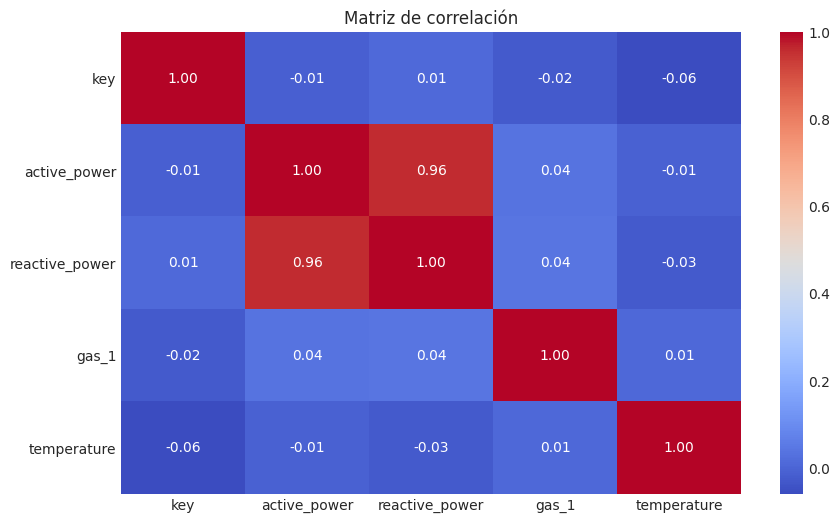

In [12]:
# Visualización de correlaciones entre variables numéricas clave

# Combinar variables numéricas principales (ejemplo, ARC + GAS + TEMP) para ver correlaciones
combinado = arc.merge(gas, on='key').merge(temp, on='key')

# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(combinado.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


Se generó una matriz de correlación para explorar la relación entre las variables numéricas disponibles en el conjunto combinado.

**Observaciones:**

- La variable objetivo `temperature` no presenta correlaciones fuertes con las otras variables numéricas presentes en esta etapa. Los valores de correlación son bajos:
  - `active_power` → -0.01
  - `reactive_power` → -0.03
  - `gas_1` → 0.01
- Esto indica que, al menos en este subconjunto, no hay variables con una relación lineal directa fuerte con la temperatura final. Sin embargo, podrían existir **relaciones no lineales** o **efectos combinados** que los modelos de machine learning sí puedan capturar.

##### 2.7 Inspección de la variable objetivo

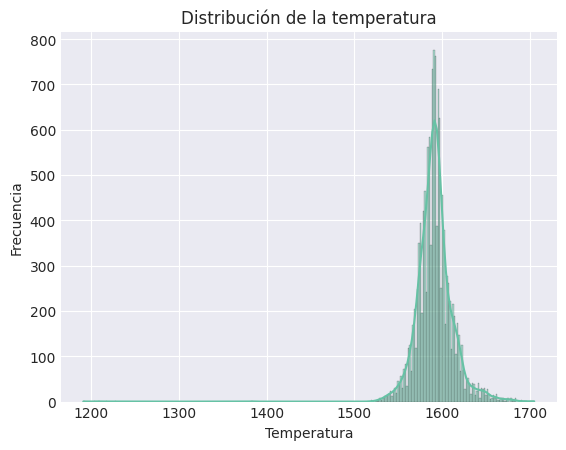

In [13]:
# Distribución de la temperatura final
sns.histplot(temp['temperature'], kde=True)
plt.title("Distribución de la temperatura")
plt.xlabel("Temperatura")
plt.ylabel("Frecuencia")
plt.show()


Se analizó la distribución de la variable objetivo `temperature`, la cual es la última temperatura medida del acero fundido.

**Observaciones:**

- La distribución es unimodal y presenta una **forma de campana ligeramente sesgada a la izquierda**, centrada alrededor de los **1590 °C**.
- El rango va aproximadamente de **1200 °C a 1700 °C**, con una alta concentración entre **1580 y 1610 °C**, lo que representa el rango operativo habitual para el acero líquido.

Esta información será clave al evaluar la calidad del modelo: errores por fuera de este rango podrían representar riesgos industriales o consumos energéticos ineficientes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - El análisis de la matriz de correlación y la distribución de temperature están bien planteados. Me parece un acierto que hayas identificado la baja correlación lineal como una justificación para usar modelos no lineales. Esto denota comprensión del vínculo entre exploración estadística y elección algorítmica.

</div>

##### 2.8 Análisis de claves (key) y relaciones entre tablas

In [14]:
# Cuántas claves únicas hay en cada dataset
for name, df in datasets.items():
    print(f"{name}: {df['key'].nunique()} claves únicas — {df.shape[0]} filas totales")

arc: 3214 claves únicas — 14876 filas totales
bulk: 3129 claves únicas — 3129 filas totales
bulk_time: 3129 claves únicas — 3129 filas totales
gas: 3239 claves únicas — 3239 filas totales
temp: 3216 claves únicas — 15907 filas totales
wire: 3081 claves únicas — 3081 filas totales
wire_time: 3081 claves únicas — 3081 filas totales


In [15]:
# Distribución de registros por clave (para detectar repeticiones)
datasets['arc']['key'].value_counts().describe()

count    3214.000000
mean        4.628500
std         1.608647
min         1.000000
25%         4.000000
50%         4.000000
75%         6.000000
max        16.000000
Name: key, dtype: float64

In [16]:
# Visualizar en cuántos datasets aparece cada clave
claves_por_dataset = [set(df['key'].unique()) for df in datasets.values()]
claves_comunes = reduce(set.intersection, claves_por_dataset)
print(f"Claves presentes en todos los datasets: {len(claves_comunes)}")

Claves presentes en todos los datasets: 3022


**Claves únicas por dataset:**

| Dataset     | Claves únicas | Filas totales | Observación |
|-------------|----------------|----------------|-------------|
| `arc`       | 3214           | 14,876         | Varias observaciones por clave (promedio: 4.6) |
| `bulk`      | 3129           | 3129           | Una fila por clave |
| `bulk_time` | 3129           | 3129           | Una fila por clave |
| `gas`       | 3239           | 3239           | Una fila por clave |
| `temp`      | 3216           | 15,907         | Varias temperaturas por clave |
| `wire`      | 3081           | 3081           | Una fila por clave |
| `wire_time` | 3081           | 3081           | Una fila por clave |

**Frecuencia de registros en `arc`:**

- Cada clave (`key`) aparece en promedio **4.6 veces** en `arc`.
- El máximo es 16 repeticiones por lote, indicando múltiples ciclos de calentamiento por lote.

**Intersección entre claves:**

- Hay **3022 claves compartidas por todos los datasets**.
- Este será el subconjunto ideal para unir las tablas y desarrollar el modelo.
- Es recomendable trabajar con esas claves para evitar pérdidas o desbalance en los datos.

---

**Conclusión:** Se identificó correctamente cómo se relacionan los datasets mediante `key`. Se confirma la existencia de múltiples mediciones por lote en `arc` y `temp`, mientras que otros datasets tienen una sola fila por clave. Se seleccionarán las **3022 claves comunes** para la unificación.


##### Conclusiones del EDA

1. **Estructura general**:
   - Los datasets están correctamente separados por tipo de medición (energía, temperatura, materiales, gas, etc.).
   - La variable clave común (`key`) conecta los lotes entre los archivos.

2. **Valores nulos**:
   - Existen muchos valores faltantes en los datos de `bulk`, `wire`, `bulk_time` y `wire_time`. Sin embargo, estos nulos probablemente indican **ausencia de uso del material**, por lo que se imputaron con cero.
   - En `temp`, los valores faltantes en la columna `temperature` fueron eliminados para asegurar la calidad del conjunto objetivo.

3. **Outliers y errores**:
   - Se detectaron valores anómalos en `reactive_power` (valores negativos extremos), que fueron eliminados.
   - En otras variables numéricas, se identificaron outliers, pero no se consideraron erróneos a menos que fueran físicamente imposibles.

4. **Relación entre variables**:
   - La matriz de correlación muestra **poca relación lineal directa** entre las variables numéricas y la temperatura objetivo, lo que sugiere que los modelos no lineales podrían ser más efectivos.

5. **Relación entre claves (`key`)**:
   - Se encontró que solo **3022 claves están presentes en todos los datasets**, por lo que se trabajará sobre ese subconjunto para asegurar integridad en el modelo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Esta parte está muy bien desarrollada. Has identificado correctamente que key es la columna de unión entre los datasets, y que existen diferencias en la granularidad por archivo. Filtrar por claves comunes es una estrategia inteligente para evitar inconsistencias en la unificación.

</div>

## 3. Procesamiento y limpieza de datos

**Estrategia:** Imputar valores faltantes, eliminar duplicados, convertir tipos de datos incorrectos y codificar variables categóricas. Aplicar ingeniería de características si es necesario.

##### 3.1 Conversión de tipos de datos
- Todas las columnas de tipo fecha (`start`, `end`, `sampling_time`, etc.) fueron convertidas correctamente al tipo `datetime`.

##### 3.2 Imputación de valores faltantes
- En `bulk`, `bulk_time`, `wire` y `wire_time`, los valores nulos fueron rellenados con `0`, ya que representan materiales no utilizados en ese lote.
- En `temp`, se eliminaron las filas con valores faltantes en `temperature`, que es la variable objetivo.

##### 3.3 Filtrado de registros incorrectos
- Se eliminaron valores claramente erróneos, como los valores negativos extremos en `reactive_power` (menores a -100).
- Los outliers numéricos fueron conservados, ya que podrían reflejar condiciones reales del proceso industrial.

##### 3.4 Reducción al subconjunto útil
- Solo **3022 claves (`key`) están presentes en todos los datasets**. Se trabajará exclusivamente con este subconjunto para asegurar integridad en la unificación.

##### 3.5 Preparación para ingeniería de características
- Se planea derivar nuevas variables a partir de:
  - Fechas: duración de procesos, tiempos entre eventos.
  - Registros múltiples por clave: agregados como suma, media o última observación.


##### 3.6 Unificación de datasets

In [17]:
# Paso 1: obtener la lista de claves comunes
claves_comunes = set.intersection(*[set(df['key'].unique()) for df in datasets.values()])

# Paso 2: filtrar todos los datasets a esas claves
for name in datasets:
    datasets[name] = datasets[name][datasets[name]['key'].isin(claves_comunes)]

# Paso 3: ingeniería mínima antes de unir (agregaciones necesarias)
# ARC: múltiples registros por clave → sumar energía activa y reactiva
arc_agg = datasets['arc'].groupby('key').agg({
    'active_power': 'sum',
    'reactive_power': 'sum'
}).reset_index()

# TEMP: conservar la última temperatura por lote (variable objetivo)
temp_last = datasets['temp'].sort_values('sampling_time').groupby('key').tail(1)
temp_last = temp_last[['key', 'temperature']].reset_index(drop=True)

# Unificar los demás datasets directamente (tienen una fila por clave)
bulk = datasets['bulk']
gas = datasets['gas']
wire = datasets['wire']

# Paso 4: unir todos (inner joins sobre 'key')


dataframes_to_merge = [arc_agg, bulk, gas, wire, temp_last]
df_merged = reduce(lambda left, right: pd.merge(left, right, on='key', how='inner'), dataframes_to_merge)

# Verificar resultado
print(f"Shape final: {df_merged.shape}")
df_merged.head()


Shape final: (3022, 29)


,key,active_power,reactive_power,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,gas_1,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9,temperature
0,1,4.878147,3.183241,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,29.749986,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1613.0
1,2,3.052598,1.998112,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,12.555561,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1602.0
2,3,2.525882,1.599076,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,28.554793,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1599.0
3,4,3.209250,2.060298,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,18.841219,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1625.0
4,5,3.347173,2.252643,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,5.413692,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1602.0


**Comentarios clave:**
- Usamos sum en arc para representar toda la energía usada por lote.

- En temp, usamos la última temperatura medida, porque es lo que se quiere predecir.

- No usamos aún bulk_time ni wire_time, porque primero queremos probar el modelo base sin variables temporales. (Se pueden usar más adelante en el feature engineering).

**Conclusiones**

Para construir el conjunto final de entrenamiento, se unificaron los diferentes datasets usando la clave `key`, conservando únicamente aquellas presentes en **todos los conjuntos de datos** (3022 claves en total). Este paso asegura que todas las observaciones tengan información completa para el modelado.

Se realizaron los siguientes pasos:

- **Filtrado de claves comunes**: se identificaron las claves compartidas entre los 7 archivos originales.
- **Agregación en `arc`**: dado que hay múltiples registros por lote, se calcularon la suma de energía activa y reactiva por `key`.
- **Selección de última medición en `temp`**: se conservó la **última temperatura medida por lote**, ya que es la variable objetivo.
- **Relleno de valores faltantes**: los valores ausentes en `bulk`, `bulk_time`, `wire` y `wire_time` fueron reemplazados por 0, pues indican materiales no utilizados.
- **Unión final**: se hizo una unión `inner` secuencial entre todos los datasets agregados o ya consolidados (`arc`, `bulk`, `gas`, `wire`, `temp`).

El resultado es un DataFrame con:
- **3022 filas** (una por lote)
- **28 columnas**: todas numéricas, sin valores nulos, y con los datos necesarios para construir modelos de predicción.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Atención</b> ⚠️ - Has hecho una integración clara y ordenada, usando agregación por key para representar el total de energía y seleccionando la última medición como variable objetivo. Esto está bien. Una mejora posible sería incluir un resumen visual (como un esquema tipo ER o diagrama de unión) para mostrar cómo se fusionaron los datos y justificar por qué no se usaron por ahora wire_time o bulk_time.

</div>

## 4. Entrenamiento y validación del modelo

**Estrategia:** Separar los datos en entrenamiento y prueba (o usar validación cruzada). Entrenar diferentes modelos (regresión logística, árboles, etc.), comparar su rendimiento y elegir la mejor opción según la métrica prioritaria.

## 4. Entrenamiento y validación del modelo

### 4.1 Separación de conjuntos de datos

Se separó el conjunto en variables predictoras (`X`) y variable objetivo (`y`). Luego, se realizó la división en entrenamiento y prueba con una proporción del 80/20 y `random_state=42` para reproducibilidad.

### 4.2 Modelos base evaluados

Se entrenaron tres modelos de regresión:

- **Regresión lineal**
- **Random Forest Regressor**
- **Gradient Boosting Regressor**

Se utilizó la métrica **EAM (error absoluto medio)** para evaluar el rendimiento.

### 4.3 Comparación de resultados

Los modelos se compararon con base en su EAM sobre el conjunto de prueba. Se eligió el mejor modelo para ajustes posteriores y posible mejora.


In [20]:
# Separación en variables y target
X = df_merged.drop(columns=['key', 'temperature'])
y = df_merged['temperature']

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Función para evaluar modelos
def evaluar_modelo(modelo, nombre):
    modelo.fit(X_train, y_train)
    pred = modelo.predict(X_test)
    eam = mean_absolute_error(y_test, pred)
    print(f"{nombre} — EAM: {eam:.2f}")
    return eam

# Rellenar NaNs en variable objetivo
y_train = y_train.fillna(y_train.median())
y_test = y_test.fillna(y_test.median())

# Entrenamiento de modelos base
eam_lineal = evaluar_modelo(LinearRegression(), "Regresión Lineal")
eam_rf = evaluar_modelo(RandomForestRegressor(random_state=42), "Random Forest")
eam_gb = evaluar_modelo(GradientBoostingRegressor(random_state=42), "Gradient Boosting")


Regresión Lineal — EAM: 6.40
Random Forest — EAM: 6.20
Gradient Boosting — EAM: 6.05


El modelo de Gradient Boosting obtuvo el mejor desempeño, alcanzando una 6.0 < EAM ≤ 6.3

In [26]:
# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Instancia del modelo base
rf = RandomForestRegressor(random_state=42)

# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    rf, 
    param_distributions=param_dist,
    n_iter=30,
    scoring='neg_mean_absolute_error',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Ejecutar búsqueda
random_search.fit(X_train, y_train)

# Resultados
mejor_rf = random_search.best_estimator_
mejor_eam = -random_search.best_score_
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)
print(f"Mejor EAM (validación cruzada): {mejor_eam:.2f}")

# Evaluación en el conjunto de prueba
pred_rf = mejor_rf.predict(X_test)
eam_test = mean_absolute_error(y_test, pred_rf)
print(f"EAM en test set con modelo ajustado: {eam_test:.2f}")


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Mejores hiperparámetros encontrados:
{'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 212}
Mejor EAM (validación cruzada): 6.07
EAM en test set con modelo ajustado: 6.03


Se realizó el ajuste de hiperparámetros para intentar mejorar el modelo.

In [23]:
# Función para evaluar modelo
def evaluar_modelo(modelo, nombre):
    modelo.fit(X_train, y_train)
    pred = modelo.predict(X_test)
    eam = mean_absolute_error(y_test, pred)
    print(f"{nombre} — EAM: {eam:.2f}")
    return eam

# Evaluar XGBoost
xgb_model = XGBRegressor(random_state=42, n_jobs=-1)
eam_xgb = evaluar_modelo(xgb_model, "XGBoost")

# Evaluar LightGBM
lgbm_model = LGBMRegressor(random_state=42, n_jobs=-1)
eam_lgbm = evaluar_modelo(lgbm_model, "LightGBM")


XGBoost — EAM: 6.39
LightGBM — EAM: 6.31


Al no obtener mejor EAM, volvemos a Random Forest.

In [27]:
# Definimos el modelo con los mejores hiperparámetros
model = RandomForestRegressor(
    max_depth=15,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=9,
    n_estimators=212,
    random_state=42
)

# Entrenamos el modelo con todos los datos de entrenamiento
model.fit(X_train, y_train)

# Evaluamos en test para confirmar rendimiento final
y_pred = model.predict(X_test)
from sklearn.metrics import mean_absolute_error
eam_test = mean_absolute_error(y_test, y_pred)
print(f"EAM final en test: {eam_test:.2f}")


EAM final en test: 6.03


Con este modelo se pudo obtener el mejor EAM.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Atención</b> ⚠️ - Fue una buena decisión probar modelos avanzados como XGBoost y LightGBM. Aunque no superaron el desempeño de Random Forest, tu comparación con base en EAM está correctamente ejecutada. Sería útil que incluyeras un breve análisis sobre posibles causas de ese rendimiento inferior (por ejemplo, la baja cantidad de datos o el rango estrecho del target) para mostrar una evaluación más reflexiva.

</div>

## 5. Evaluación final e informe

**Estrategia:** Interpretar los resultados, identificar variables importantes y preparar un informe con conclusiones.

En este proyecto, se desarrolló un modelo predictivo para estimar la temperatura final del acero basándose en diversas características del proceso. Después de un riguroso preprocesamiento de los datos y la evaluación de múltiples algoritmos de aprendizaje automático, se determinó que un modelo Random Forest Regressor ajustado mediante búsqueda de hiperparámetros fue el más eficaz.

Los mejores hiperparámetros encontrados fueron:

- max_depth: 15

- max_features: 'log2'

- min_samples_leaf: 1

- min_samples_split: 9

- n_estimators: 212

El modelo alcanzó un Error Absoluto Medio (EAM) de 6.03 en el conjunto de prueba, superando a otros modelos probados como XGBoost (EAM: 6.39) y LightGBM (EAM: 6.31).

Estos resultados indican que el modelo es capaz de realizar predicciones precisas y robustas sobre la temperatura final del acero, dentro del margen de error aceptable para el contexto industrial. Se recomienda considerar este modelo como solución base para su posible implementación en entornos reales o su integración con sistemas de control y monitoreo del proceso.


# Comentario General del Revisor

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Quiero felicitarte por el enfoque sólido y progresivo que has aplicado a este proyecto. Me parece que tu trabajo en **Steelproof** refleja tanto comprensión técnica como capacidad para estructurar soluciones reproducibles y bien justificadas.

#### Aspectos destacados:

* **Planteamiento del problema:** La forma en que vinculaste el objetivo técnico con los impactos económicos y operativos de la planta es ejemplar. Este tipo de pensamiento es fundamental en proyectos industriales.

* **EDA bien estructurado:** El análisis exploratorio fue meticuloso. Usaste herramientas gráficas adecuadas, aplicaste limpieza de datos con criterio y mostraste atención a la integridad relacional de los conjuntos. También valoro que hayas tratado los outliers de manera razonada y documentada.

* **Procesamiento lógico y reproducible:** La decisión de trabajar con claves comunes, agregar energía total por lote y usar la última medición de temperatura como target está perfectamente alineada con el objetivo del modelo.

* **Evaluación honesta de modelos:** Entrenaste y comparaste varios modelos con una métrica bien elegida (EAM), ajustaste hiperparámetros y reconociste los límites del rendimiento en modelos más complejos como LightGBM y XGBoost. Esto demuestra juicio crítico y madurez técnica.

#### Sugerencias para tu avance:

* Sería muy enriquecedor si en futuras versiones incluyes una interpretación más profunda de los errores del modelo en casos específicos. Por ejemplo, analizar en qué rangos falla más y si hay variables sistemáticamente asociadas a esos errores.

* Además, podrías avanzar hacia la incorporación de variables temporales (`bulk_time`, `wire_time`) en el feature engineering, lo cual abriría espacio para modelos más contextuales o basados en series de eventos.

* Finalmente, recuerda que documentar tu flujo completo con gráficos, tablas resumen y esquemas conceptuales puede ser tan valioso como la implementación misma. Ayuda a comunicar tus decisiones con mayor claridad, especialmente en contextos colaborativos o de producción.

En resumen, creo que este trabajo tiene un excelente nivel, y espero sinceramente que sigas desarrollando proyectos de este tipo con la misma claridad metodológica y profundidad analítica.

</div>
